In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Housing.csv')  # Replace with the actual file path

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [164]:
print(df.isnull().sum())

df = df.dropna()

le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

X=df.iloc[:,1:]
y=df.iloc[:,0]

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle = True)


In [166]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [167]:
y_pred = model.predict(X_test)


In [168]:
r_squared = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


R-squared: 0.7624579467323476
Mean Squared Error: 807848838640.2026
Mean Absolute Error: 731365.8227168076


In [169]:
slope= model.coef_
bias= model.intercept_
print(slope, bias)


[ 2.33422753e+02  1.31359038e+05  9.34881910e+05  4.72320923e+05
  5.41194856e+05  2.29143822e+05  3.17025949e+05  8.99970250e+05
  8.86233835e+05  3.01650489e+05  6.48065583e+05 -2.05169335e+05] 48173.88617875334


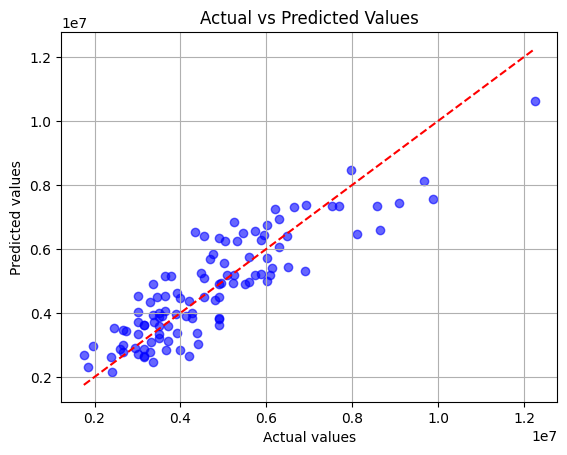

In [170]:
plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
plt.show()